### 라이브러리 및 데이터 불러오기

In [2]:
### 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 결측값 시각화를 위한 라이브러리
import missingno as msno

# 폰트 설정

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=True)
plt.rcParams.update({
    'font.size': 6,          # 폰트 크기
    'figure.dpi': 150,        # DPI 설정
    'savefig.dpi': 300        # 저장 시 DPI 설정
})

In [3]:
### 데이터 불러오기
import pandas as pd
df = pd.read_csv('./final_result.csv')
df.head()

,id,title,score_val,category,descript,reviews,keyword1,keyword2,keyword3
0,35849217,쭈꾸미블루스 신촌본점,4.59,주꾸미요리,신촌 맛집 날치알쌈과 매운 쭈꾸미,노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서.먹었는데요 양념...,음식이 맛있어요,친절해요,인테리어가 멋져요
1,1749849331,금고기비스트로 신촌,NaN,"육류,고기요리",NaN,지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...,음식이 맛있어요,고기 질이 좋아요,친절해요
2,1198813653,댄싱홍콩 신촌점,NaN,중식당,NaN,협력사들과 회의 끝내고 오찬 같이했네요 간만에 오니 새로운 메뉴도 생기고.. 사람...,음식이 맛있어요,인테리어가 멋져요,특별한 메뉴가 있어요
3,1071728472,정통집 신촌점,4.32,돼지고기구이,NaN,이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다. h...,음식이 맛있어요,양이 많아요,친절해요
4,1491059869,오적회관 신촌점,NaN,한식,NaN,📺'생방송투데이'와 '맛의 승부사'에도 방영될 정도로 검증된 유명한 💢핫플매장이더라...,음식이 맛있어요,양이 많아요,재료가 신선해요


## 전처리

### 데이터 기본 정보 확인

In [4]:
### 데이터셋 크기 - 694개의 매장, 9개의 변수
print(df.shape)

(694, 9)


In [5]:
### 기본 정보 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         694 non-null    int64  
 1   title      694 non-null    object 
 2   score_val  411 non-null    float64
 3   category   694 non-null    object 
 4   descript   197 non-null    object 
 5   reviews    688 non-null    object 
 6   keyword1   670 non-null    object 
 7   keyword2   670 non-null    object 
 8   keyword3   670 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 48.9+ KB


- score_val만 numeric variable
- score_val과 descript에 결측치가 많음

In [6]:
### 기초통계량 확인
df.describe(include='all')

,id,title,score_val,category,descript,reviews,keyword1,keyword2,keyword3
count,6.940000e+02,694,411.000000,694,197,688,670,670,670
unique,NaN,694,NaN,103,121,688,16,24,31
top,NaN,쭈꾸미블루스 신촌본점,NaN,"카페,디저트",농림축산식품부 제공 안심식당,노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서.먹었는데요 양념...,음식이 맛있어요,친절해요,친절해요
freq,NaN,1,NaN,77,60,1,489,169,183
mean,9.644206e+08,NaN,4.493942,NaN,NaN,NaN,NaN,NaN,NaN
std,7.208154e+08,NaN,0.164158,NaN,NaN,NaN,NaN,NaN,NaN
min,1.156046e+07,NaN,3.960000,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.736842e+07,NaN,4.390000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.175964e+09,NaN,4.480000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.580253e+09,NaN,4.590000,NaN,NaN,NaN,NaN,NaN,NaN


- id, title : 고유한 값만을 가지고 있음 → 분석에서 제외
- score_val : 유일한 numeric 변수, 
- category : 고유한 값은 103개, 카페,디저트가 제일 많음
- descript : 고유한 값은 121, 중복되는 매장 설명글이 존재
- keyword1 : 고유한 값은 16개, '음식이 맛있어요'가 489개로 가장 많음
- keyword2 : 고유한 값은 24개, '친절해요'가 169개로 가장 많음
- keyword3 : 고유한 값은 31개, '친절해요'가 183개로 가장 많음
- reviews : 고유한 값만을 가지고 있음, 중복 리뷰 없음

id             0
title          0
score_val    283
category       0
descript     497
reviews        6
keyword1      24
keyword2      24
keyword3      24
dtype: int64


<AxesSubplot:>

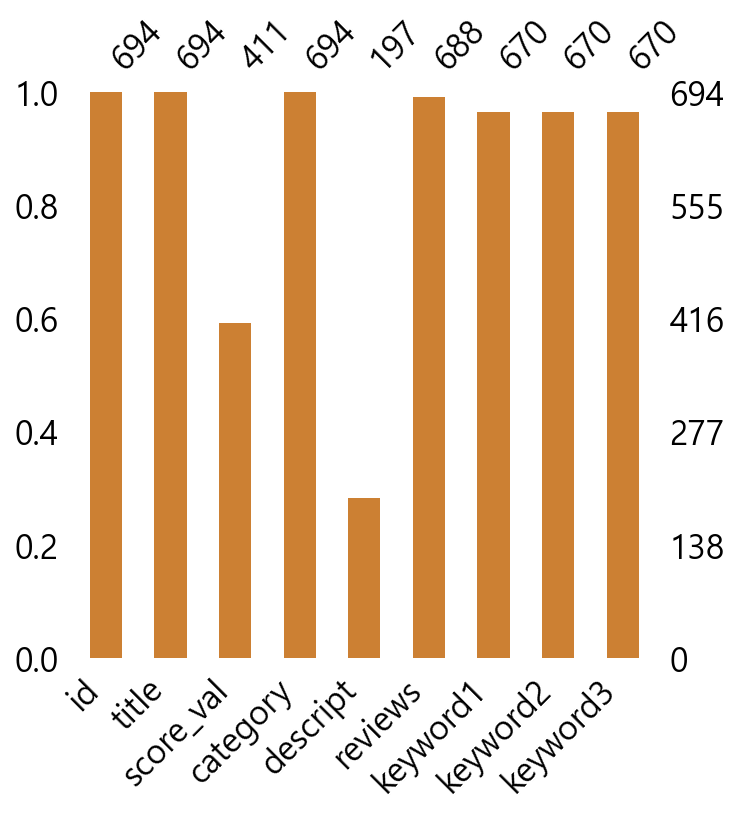

In [7]:
### 결측치 확인
print(df.isnull().sum())

# 결측치 시각화 
import missingno as msno
msno.bar(df=df.iloc[:,:], figsize=(5,5), color=(0.8,0.5,0.2))

- score_val : 결측치 283개 존재 
- descript : 결측치 497개 존재 → 모델 학습에서 제외
- keyword : 결측치 24개씩 존재 → dropna
- reviews : 결측치 6개 존재 → dropna

### 필요없는 변수 

- id, title은 식별값이므로 모델 학습에 필요하지 않음
- score_val과 descript는 결측값이 많으므로 분석에서 제외

In [8]:
df = df.drop(['id','title','score_val','descript'], axis=1)
df.shape

(694, 5)

### 결측치 처리

- target값(keyword)에 결측값이 존재하므로 dropna

    → 최종 670개의 매장, 2개의 독립변수(category, reviews), 3개의 종속변수(keyword1/keyword2/keyword3)

In [9]:
df = df.dropna()
print(df.isnull().sum())
print(df.shape)

category    0
reviews     0
keyword1    0
keyword2    0
keyword3    0
dtype: int64
(670, 5)


### category 변수 재분류

- 너무 많은 level이 존재 → 조금 더 큰 범위로 재분류

<AxesSubplot:>

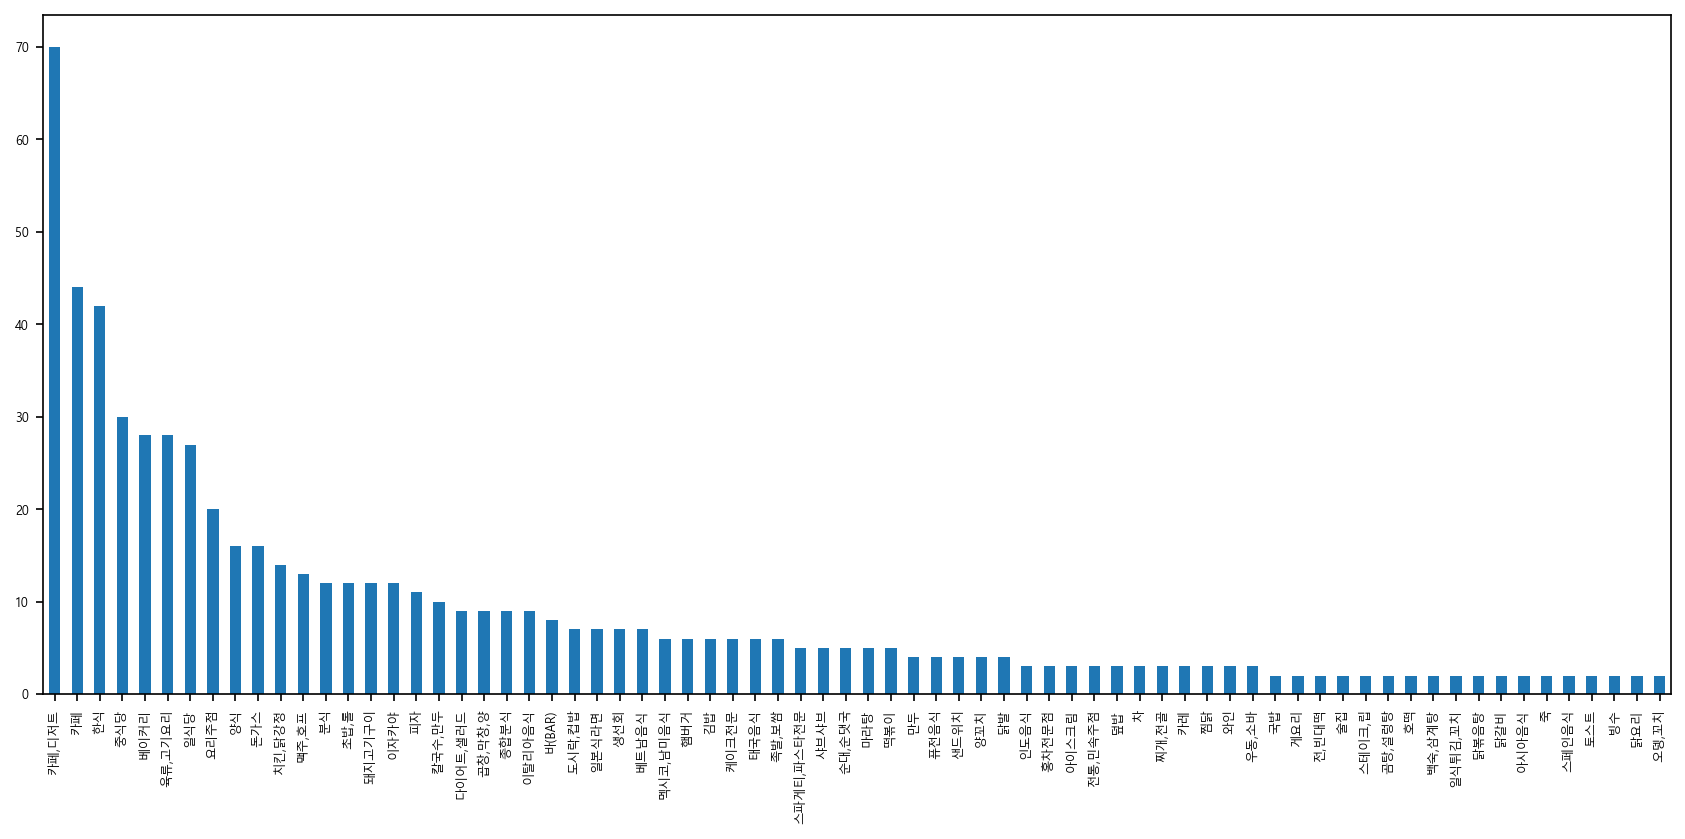

In [10]:
### category 분포 확인
plt.figure(figsize=(14,6))
type_value_counts = df['category'].value_counts()
type_value_counts[type_value_counts>1].plot.bar()   # value_counts가 1보다 큰 값에 대해서만 시각화 

In [11]:
print(df['category'].value_counts().index[:50])
print(df['category'].value_counts().index[50:])

Index(['카페,디저트', '카페', '한식', '중식당', '베이커리', '육류,고기요리', '일식당', '요리주점', '양식',
       '돈가스', '치킨,닭강정', '맥주,호프', '분식', '초밥,롤', '돼지고기구이', '이자카야', '피자',
       '칼국수,만두', '다이어트,샐러드', '곱창,막창,양', '종합분식', '이탈리아음식', '바(BAR)', '도시락,컵밥',
       '일본식라면', '생선회', '베트남음식', '멕시코,남미음식', '햄버거', '김밥', '케이크전문', '태국음식',
       '족발,보쌈', '스파게티,파스타전문', '샤브샤브', '순대,순댓국', '마라탕', '떡볶이', '만두', '퓨전음식',
       '샌드위치', '양꼬치', '닭발', '인도음식', '홍차전문점', '아이스크림', '전통,민속주점', '덮밥', '차',
       '찌개,전골'],
      dtype='object')
Index(['카레', '찜닭', '와인', '우동,소바', '국밥', '게요리', '전,빈대떡', '술집', '스테이크,립',
       '곰탕,설렁탕', '호떡', '백숙,삼계탕', '일식튀김,꼬치', '닭볶음탕', '닭갈비', '아시아음식', '죽',
       '스페인음식', '토스트', '빙수', '닭요리', '오뎅,꼬치', '감자탕', '냉면', '아귀찜,해물찜', '주꾸미요리',
       '브런치카페', '한식뷔페', '찐빵', '두부요리', '와플', '테이크아웃커피', '밀키트', '푸드코트', '브런치',
       '소고기구이', '해물,생선요리', '딤섬,중식만두', '백반,가정식', '복어요리', '낙지요리', '프랑스음식',
       '대게요리', '패밀리레스토랑', '고기뷔페', '한정식-일반', '향토음식', '해장국', '추어탕', '조개요리', '국수',
       '베이글', '라면'],
      dtype='object')


 "카페 및 디저트": '카페,디저트', '카페', '베이커리', '케이크전문', '아이스크림', '빙수', '호떡', '토스트', '와플', '홍차전문점', '차', '테이크아웃커피', '브런치카페', '브런치'
 
 "한식": '한식', '곰탕,설렁탕', '국밥', '백숙,삼계탕', '감자탕', '순대,순댓국', '찌개,전골', '해장국', '추어탕', '한정식-일반', '백반,가정식', '향토음식', '칼국수,만두'
 
 "중식": '중식당', '마라탕', '양꼬치', '딤섬,중식만두'
 
 "일식": '일식당', '초밥,롤', '일본식라면', '우동,소바', '일식튀김,꼬치', '이자카야'
 
 "양식": '양식', '이탈리아음식', '스파게티,파스타전문', '프랑스음식', '패밀리레스토랑', '스페인음식'
 
 "기타 아시아 음식": '베트남음식', '태국음식', '인도음식', '아시아음식'
 
 "고기 요리": '육류,고기요리', '스테이크,립', '돼지고기구이', '소고기구이', '족발,보쌈', '곱창,막창,양', '닭발', '닭볶음탕', '닭갈비', '닭요리'
 
 "패스트푸드 및 분식": '치킨,닭강정','피자', '분식', '종합분식', '떡볶이', '돈가스', '햄버거', '김밥', '샌드위치', '도시락,컵밥', '만두', '밀키트', '푸드코트', '라면', '국수',  '오뎅,꼬치'
 
 "주점": '요리주점', '맥주,호프', '바(BAR)', '전통,민속주점', '술집', '와인'
 
 "해산물 요리": '생선회', '해물,생선요리', '아귀찜,해물찜', '주꾸미요리', '낙지요리', '복어요리', '대게요리', '조개요리', '게요리'
 
 "퓨전 및 기타": '퓨전음식', '다이어트,샐러드', '죽', '전,빈대떡', '두부요리', '카레', '찜닭', '덮밥'

<AxesSubplot:>

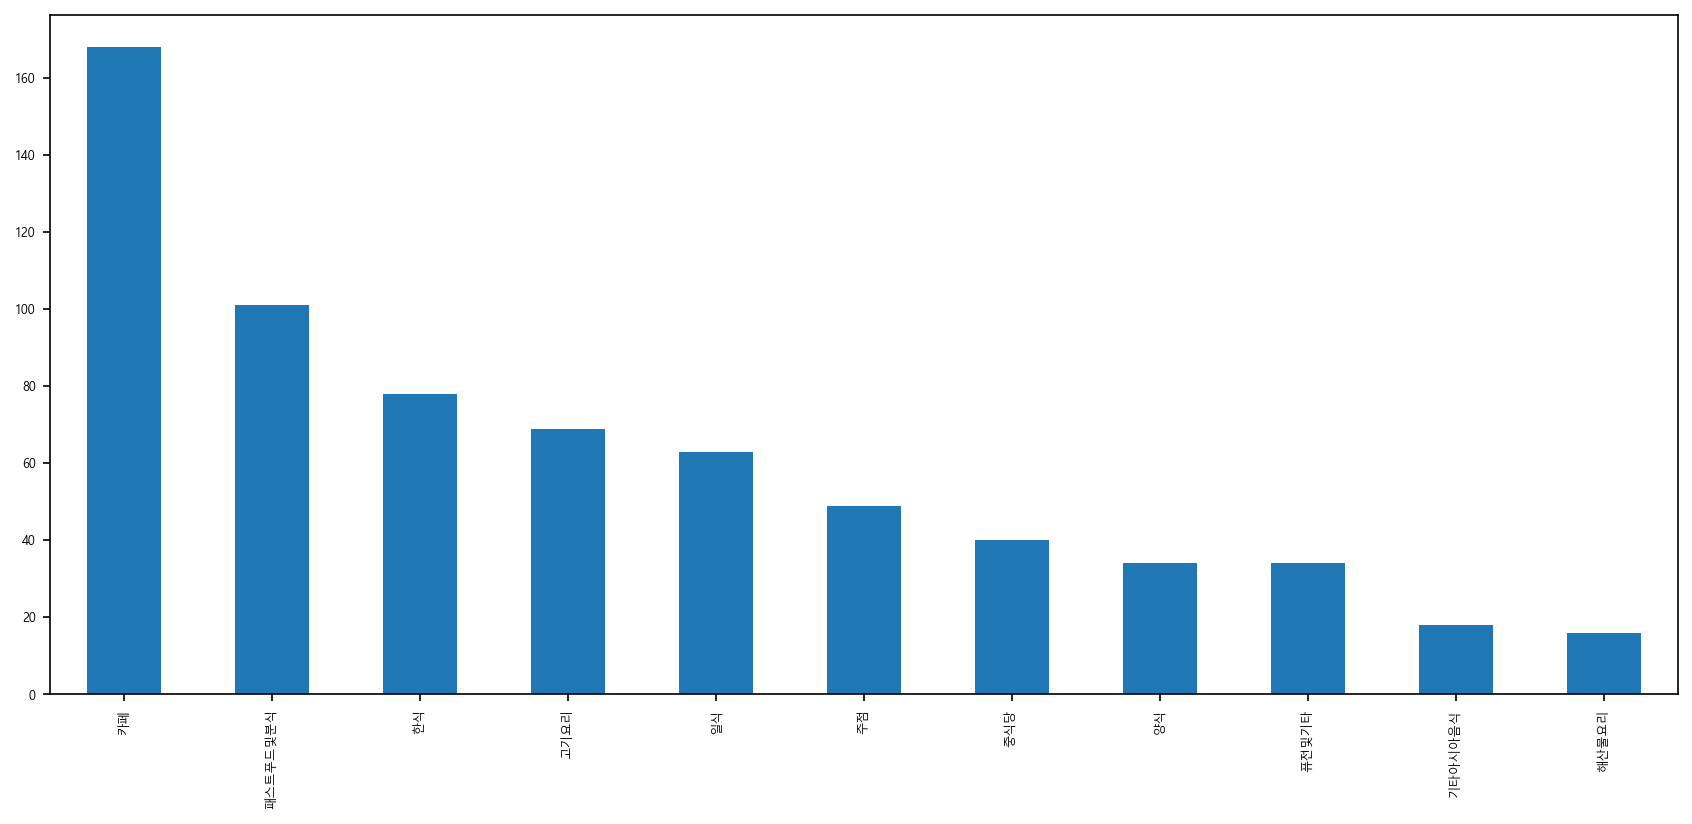

In [12]:
a = ['카페,디저트','카페','베이커리','케이크전문','아이스크림','빙수','호떡',
     '토스트','와플','홍차전문점','차','테이크아웃커피','브런치카페','브런치','베이글']
re = {k: '카페' for k in a}

df_cat = df.copy()
df_cat['category'].replace(re, inplace=True)

b = ['한식','곰탕,설렁탕','국밥','백숙,삼계탕','감자탕','순대,순댓국','찌개,전골',
     '해장국','추어탕','한정식-일반','백반,가정식','향토음식','칼국수,만두','샤브샤브','한식뷔페']
re = {k: '한식' for k in b}
df_cat['category'].replace(re, inplace=True)

c = ['중식당','마라탕','양꼬치','딤섬,중식만두']
re = {k: '중식당' for k in c}
df_cat['category'].replace(re, inplace=True)

d = ['일식당','초밥,롤','일본식라면','우동,소바','일식튀김,꼬치','이자카야']
re = {k: '일식' for k in d}
df_cat['category'].replace(re, inplace=True)

e = ['양식','이탈리아음식','스파게티,파스타전문','프랑스음식','패밀리레스토랑','스페인음식']
re = {k: '양식' for k in e}
df_cat['category'].replace(re, inplace=True)

f = ['베트남음식','태국음식','인도음식','아시아음식']
re = {k: '기타아시아음식' for k in f}
df_cat['category'].replace(re, inplace=True)

g = ['육류,고기요리','스테이크,립','돼지고기구이','소고기구이','족발,보쌈','곱창,막창,양','닭발', 
     '닭볶음탕','닭갈비','닭요리','고기뷔페']
re = {k: '고기요리' for k in g}
df_cat['category'].replace(re, inplace=True)

h = ['치킨,닭강정','피자','분식','종합분식','떡볶이','돈가스','햄버거','김밥','샌드위치',
     '도시락,컵밥','만두','밀키트','푸드코트','라면','국수','오뎅,꼬치','냉면']
re = {k: '패스트푸드및분식' for k in h}
df_cat['category'].replace(re, inplace=True)

i = ['요리주점','맥주,호프','바(BAR)','전통,민속주점','술집','와인']
re = {k: '주점' for k in i}
df_cat['category'].replace(re, inplace=True)

j = ['생선회','해물,생선요리','아귀찜,해물찜','주꾸미요리','낙지요리','복어요리','대게요리','조개요리','게요리']
re = {k: '해산물요리' for k in j}
df_cat['category'].replace(re, inplace=True)
     
l = ['퓨전음식','다이어트,샐러드','죽','전,빈대떡','두부요리','카레','찜닭','덮밥','멕시코,남미음식','찐빵']
re = {k: '퓨전및기타' for k in l}
df_cat['category'].replace(re, inplace=True)

df_cat['category'].value_counts()

plt.figure(figsize=(14,6))
df_cat['category'].value_counts().plot.bar()

### 리뷰 데이터의 이모티콘 제거

In [ ]:
!pip install emoji

In [13]:
import emoji
import re

# 이모티콘 제거 함수
def remove_emoji(text):
    text = emoji.demojize(text)
    emoji_name_pattern = r':[a-zA-Z_]+:'
    return re.sub(emoji_name_pattern, '', text)

df_emoji = df_cat.copy()
df_emoji['reviews'] = df_emoji['reviews'].apply(remove_emoji)

print(df['reviews'][1])  # 이모티콘 제거 전
print(df_emoji['reviews'][1])  # 이모티콘 제거 후

지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 고기도 직접 다 구워 주시고 한기 곁들여 먹을 수 있는 소스나 반찬도 너무 맛있었습니다 특히 분위기가 너무 예뻐서 계획 없이 와도 술이 술술 들어갈 거 같은 분위기예요 / 정말 맛있는 고기를 먹을 수 있는 곳이에요! 고기 퀄리티도 좋지만 수준 높은 그릴링 서비스로 딱 맞는 굽기정도로 고기를 제공해줍니다! 속은 촉촉하고 겉은 바삭한 삼겹살이에요~~ 들기름막국수는 꼭 드세요! 후회없으실꺼에요 / 정신없이 먹느라 사진은 못짹었고.. 둘이서 삼겹, 항정 먹었습니다!   맛 4.5 / 5점 서비스 5점 / 5점  거의 완벽합니다! 양갈비처럼 바테이블에 화로가 있고 직원분께서 구워주십니다.  다낭 갔다가 귀국 후 한식이 너무 땡겨 찾아왔는데 정말 맛있었어요!!  다만, 열사병에 걸려 더위먹고 정신 못차리고 있었는데 그걸 캐치하셔서 정말 스윗하게 얼음도 챙겨주시고 선풍기도 꺼내주시고 배려가 넘치셨습니다 ㅠㅠㅠㅠㅠㅠ  고기도 맛있었고 여기 솥밥이라 고기랑 밥이 조합이 일품입니다  비록 더위먹어서 사진찍는걸 잊었지만 아무튼 이 근방에서 4년째 거주중인데 이런 고깃집이 있다는거에 놀랐네요!! / 다 구어주고, 인테리오도 깔끔하고 좋아요. 사이두 메뉴도 다 맛있어요~~ 담에 재방문 합니다. / 삼겹살데이에 갔다가 반해서 또 방문한 금고기비스트로에요!! 😆 삼겹살에 목살, 된장밥, 국수까지 짝꿍이랑 야무지게 흡입하고 왔습니당!! ☺️ 잡내없고 직접 구워주시니 딱 맛있게 구워주셔서 더더더 좋아요! 친절한 사장님 담주에도 또 갈게여!! ♥️ / 이렇게 고기가 맛잇고 고급스럴수잇나요 신촌에서 데이트나 소개팅은 강추함니다! / 고기 질도 좋고 너무 맛있었어요... 재방문의사 완전 있습니다ㅠ 분위기 좋아서 데이트하기에도 좋을 것 같았어요 / 진짜 뭐하나 빠짐없이 맛있었습니당 돼지 다맛있네요 다음엔 소에 진심이라는 사장님말씀에 소먹으러 가겠습니당👍🏻👍🏻👍🏻 / 맛도, 분위기도 최고인 신촌삼겹살 맛집으로 추천합니

### 전처리한 데이터 내보내기

In [52]:
df_emoji.to_csv("./preprocessed_store_data.csv", encoding='utf-8-sig', index=False)
df_emoji.head()

,category,reviews,keyword1,keyword2,keyword3
0,해산물요리,노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서.먹었는데요 양념...,음식이 맛있어요,친절해요,인테리어가 멋져요
1,고기요리,지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...,음식이 맛있어요,고기 질이 좋아요,친절해요
2,중식당,협력사들과 회의 끝내고 오찬 같이했네요 간만에 오니 새로운 메뉴도 생기고.. 사람...,음식이 맛있어요,인테리어가 멋져요,특별한 메뉴가 있어요
3,고기요리,이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다. h...,음식이 맛있어요,양이 많아요,친절해요
4,한식,'생방송투데이'와 '맛의 승부사'에도 방영될 정도로 검증된 유명한 핫플매장이더라구요...,음식이 맛있어요,양이 많아요,재료가 신선해요


### label encoding

- 시각화 편의를 위해서 라벨인코딩 결과는 따로 저장하지 않음

In [57]:
from sklearn.preprocessing import LabelEncoder
df_label = df_emoji.copy()

### category label encoding
le_cat = LabelEncoder()
df_label[['category']] = (df_label[['category']]).apply(le_cat.fit_transform)
print(le_cat.classes_)

### keyword label encoding
le_key = LabelEncoder()
df_label[['keyword1','keyword2','keyword3']] = df_label[['keyword1','keyword2','keyword3']].apply(le_key.fit_transform)
print(le_key.classes_)

df_label.head()

['고기요리' '기타아시아음식' '양식' '일식' '주점' '중식당' '카페' '패스트푸드및분식' '퓨전및기타' '한식'
 '해산물요리']
['가성비가 좋아요' '고기 질이 좋아요' '기본 안주가 좋아요' '단체모임 하기 좋아요' '대화하기 좋아요' '디저트가 맛있어요'
 '매장이 넓어요' '매장이 청결해요' '메뉴 구성이 알차요' '뷰가 좋아요' '빵이 맛있어요' '사진이 잘 나와요'
 '선물하기 좋아요' '술이 다양해요' '아늑해요' '양이 많아요' '음료가 맛있어요' '음식이 맛있어요' '음식이 빨리 나와요'
 '음악이 좋아요' '인테리어가 멋져요' '재료가 신선해요' '좌석이 편해요' '직접 잘 구워줘요' '집중하기 좋아요'
 '차가 맛있어요' '친절해요' '커피가 맛있어요' '특별한 날 가기 좋아요' '특별한 메뉴가 있어요' '혼밥하기 좋아요']


,category,reviews,keyword1,keyword2,keyword3
0,10,노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서.먹었는데요 양념...,6,19,20
1,0,지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...,6,1,26
2,5,협력사들과 회의 끝내고 오찬 같이했네요 간만에 오니 새로운 메뉴도 생기고.. 사람...,6,14,29
3,0,이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다. h...,6,10,26
4,9,'생방송투데이'와 '맛의 승부사'에도 방영될 정도로 검증된 유명한 핫플매장이더라구요...,6,10,21


## EDA

In [46]:
### 데이터 다시 불러오기
df = pd.read_csv("./preprocessed_store_data.csv", encoding='utf-8')
df.head()

,category,reviews,keyword1,keyword2,keyword3
0,해산물요리,노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서.먹었는데요 양념...,음식이 맛있어요,친절해요,인테리어가 멋져요
1,고기요리,지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...,음식이 맛있어요,고기 질이 좋아요,친절해요
2,중식당,협력사들과 회의 끝내고 오찬 같이했네요 간만에 오니 새로운 메뉴도 생기고.. 사람...,음식이 맛있어요,인테리어가 멋져요,특별한 메뉴가 있어요
3,고기요리,이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다. h...,음식이 맛있어요,양이 많아요,친절해요
4,한식,'생방송투데이'와 '맛의 승부사'에도 방영될 정도로 검증된 유명한 핫플매장이더라구요...,음식이 맛있어요,양이 많아요,재료가 신선해요


### category 분포 시각화

<AxesSubplot:>

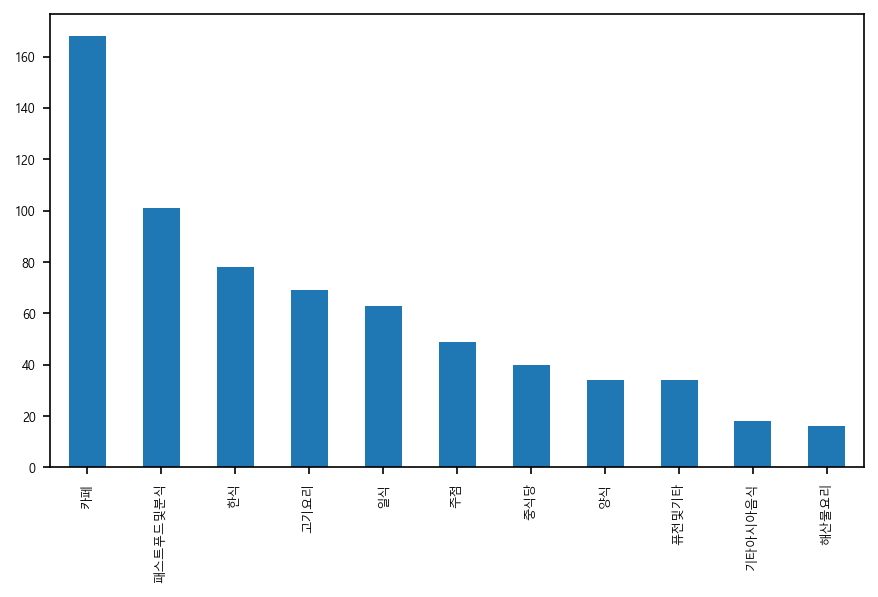

In [16]:
plt.figure(figsize=(7,4))
df_cat['category'].value_counts().plot.bar()

### keyword 분포 시각화

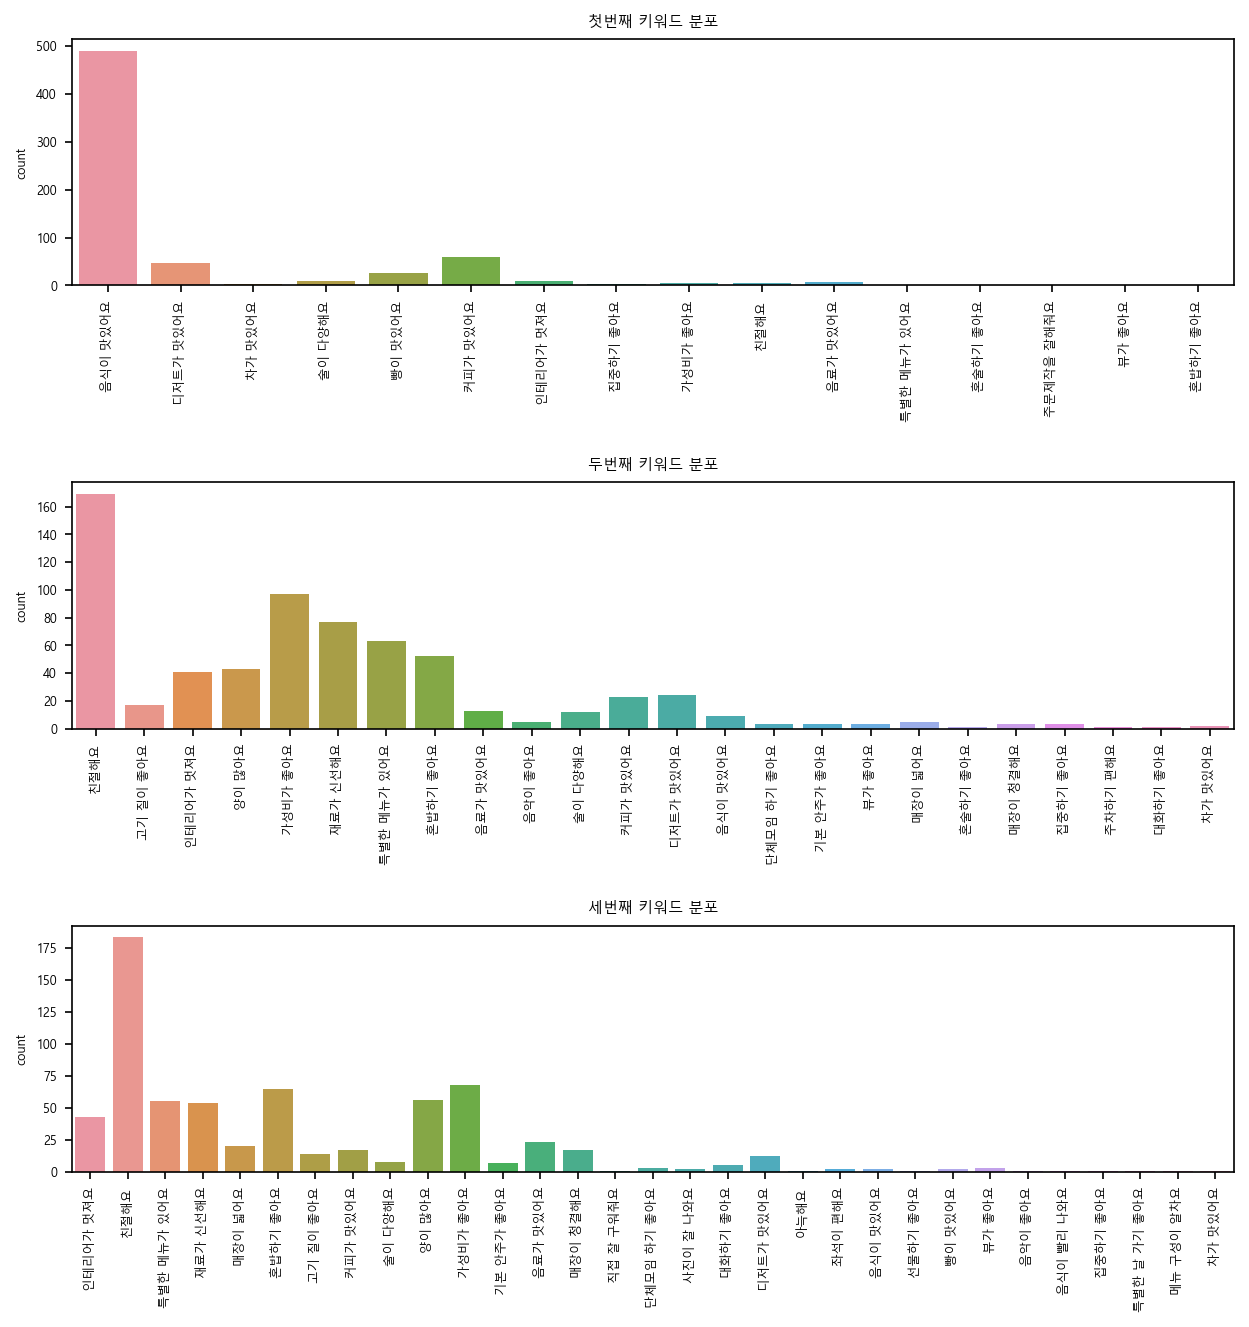

In [17]:
### keyword1 분포 확인
fig, ax = plt.subplots(3, 1, figsize=(10,10))
sns.countplot(x='keyword1', data=df, ax=ax[0])
ax[0].set_title('첫번째 키워드 분포')
ax[0].set_xlabel('')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(x='keyword2', data=df, ax=ax[1])
ax[1].set_title('두번째 키워드 분포')
ax[1].set_xlabel('')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

sns.countplot(x='keyword3', data=df, ax=ax[2])
ax[2].set_title('세번째 키워드 분포')
ax[2].set_xlabel('')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.2, hspace=0.8)
plt.show()

- **첫번째 키워드** : '음식이 맛있어요' → '커피가 맛있어요' → '디저트가 맛있어요' → '빵이 맛있어요' 순

- **두번째 키워드** : '친절해요' → '가성비가 좋아요' → '재료가 신선해요' → '특별한 메뉴가 있어요' 순

- **세번째 키워드** : '친절해요' → '가성비가 좋아요' → '혼밥하기 좋아요' → '양이 많아요' 순

### category별 키워드 분포

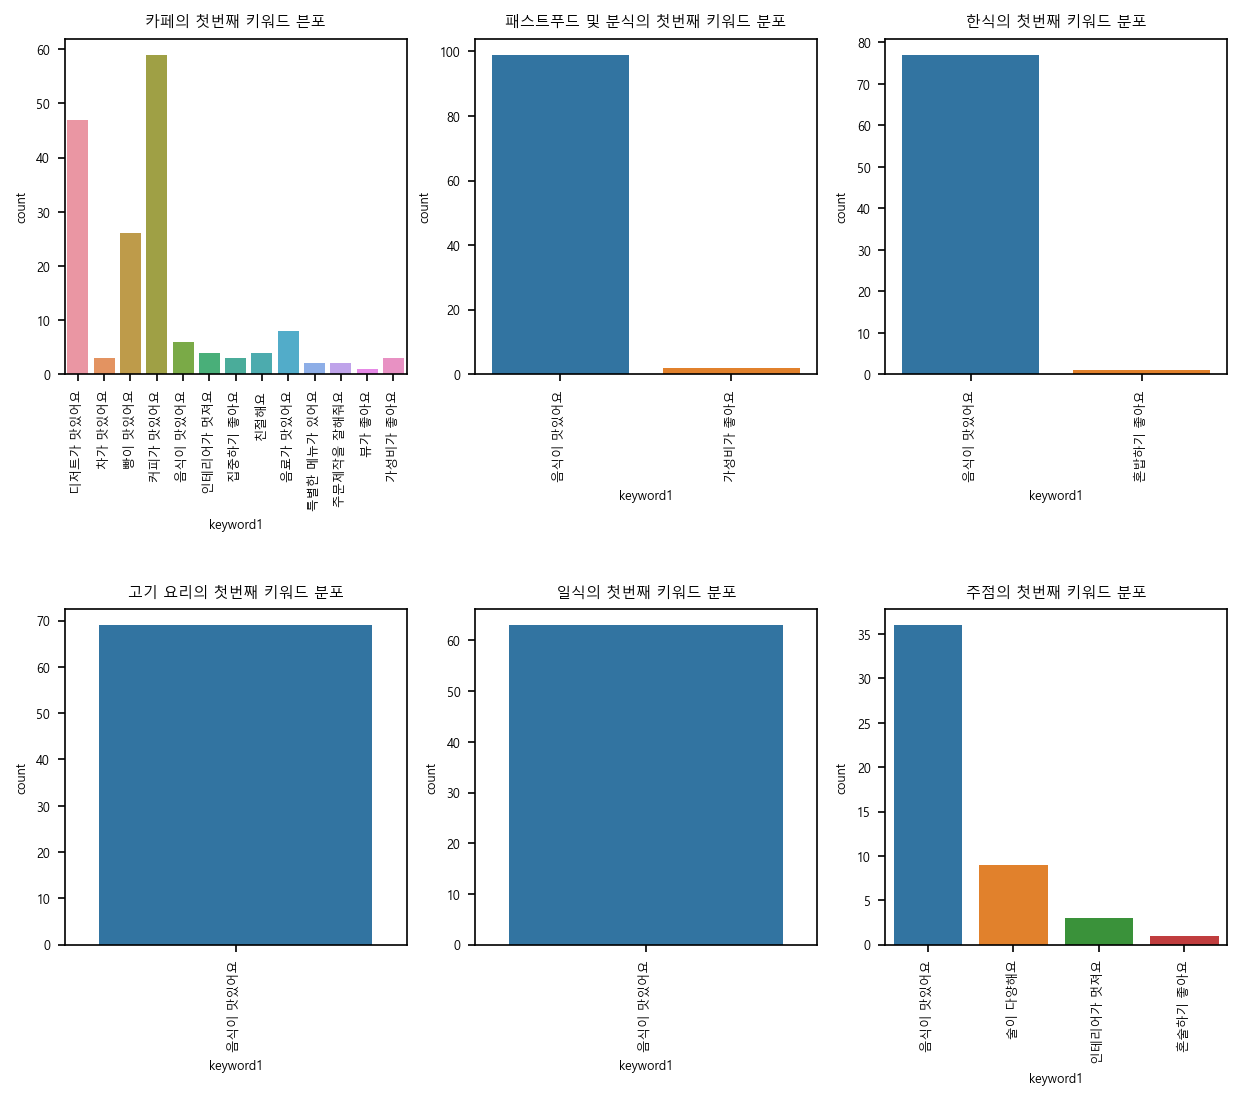

In [18]:
### keyword1
f, ax = plt.subplots(2,3,figsize=(10,8))

sns.countplot(x='keyword1', data=df[df['category']=='카페'], ax=ax[0,0])
ax[0,0].set_title('카페의 첫번째 키워드 븐포')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90)

sns.countplot(x='keyword1', data=df[df['category']=='패스트푸드및분식'], ax=ax[0,1])
ax[0,1].set_title('패스트푸드 및 분식의 첫번째 키워드 분포')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90)

sns.countplot(x='keyword1', data=df[df['category']=='한식'], ax=ax[0,2])
ax[0,2].set_title('한식의 첫번째 키워드 분포')
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=90)

sns.countplot(x='keyword1', data=df[df['category']=='고기요리'], ax=ax[1,0])
ax[1,0].set_title('고기 요리의 첫번째 키워드 분포')
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

sns.countplot(x='keyword1', data=df[df['category']=='일식'], ax=ax[1,1])
ax[1,1].set_title('일식의 첫번째 키워드 분포')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

sns.countplot(x='keyword1', data=df[df['category']=='주점'], ax=ax[1,2])
ax[1,2].set_title('주점의 첫번째 키워드 분포')
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.2, hspace=0.7)
plt.show()

- 카페의 경우 다양한 키워드를 선택
- 패스트푸드및분식, 한식, 고기요리, 일식은 대부분 '음식이 맛있어요' 선택
- 주점의 경우 비교적 다양한 키워드가 나타나나, '음식이 맛있어요' 선택 비율이 가장 높음

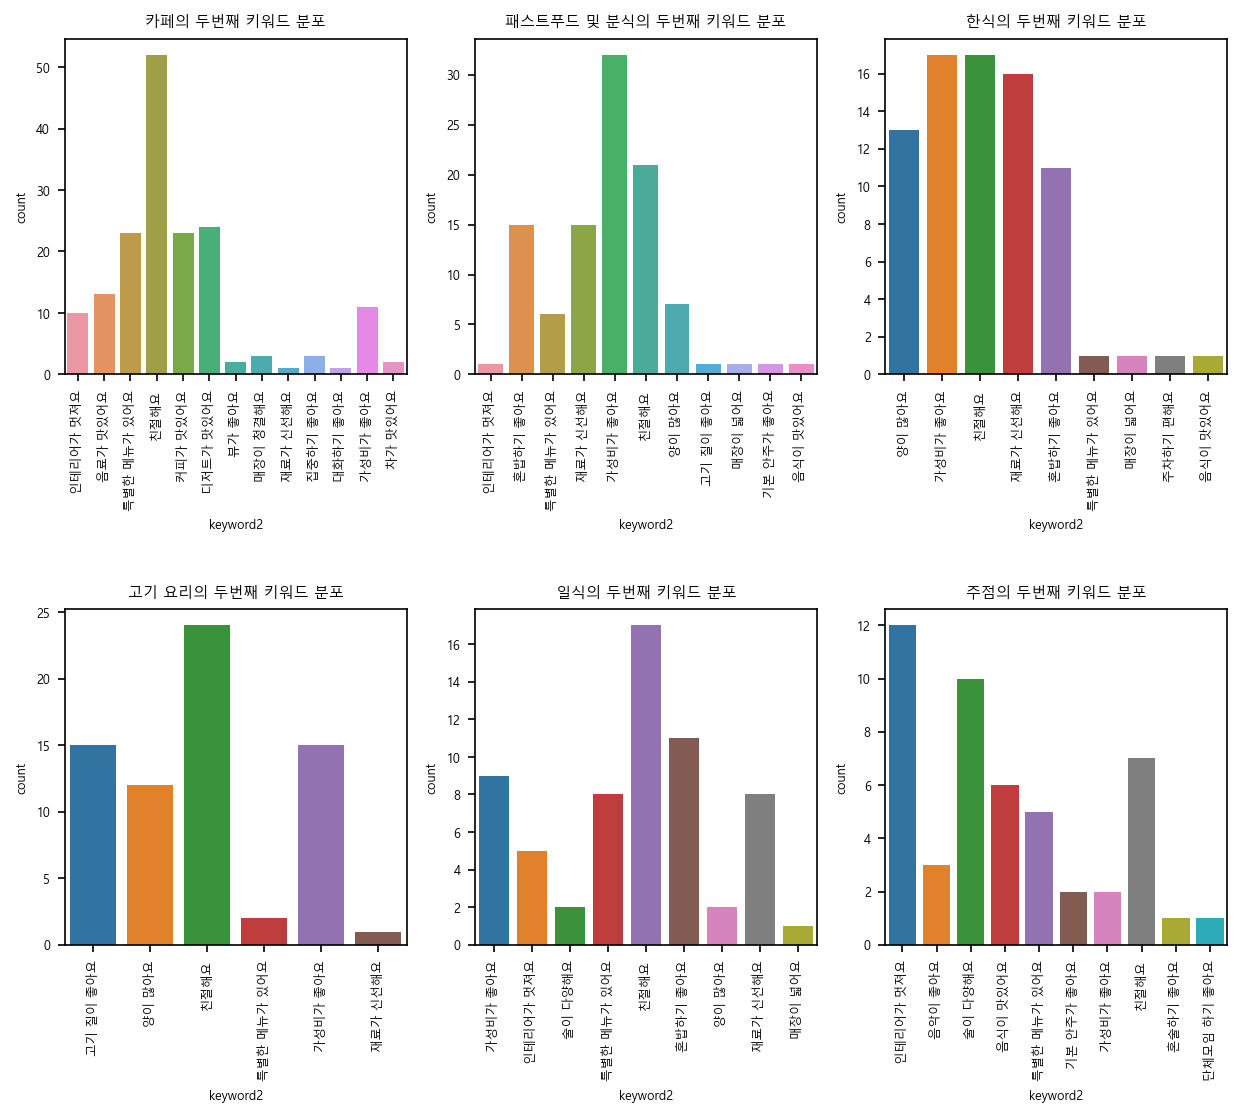

In [19]:
### keyword2
f, ax = plt.subplots(2,3,figsize=(10,8))

sns.countplot(x='keyword2', data=df[df['category']=='카페'], ax=ax[0,0])
ax[0,0].set_title('카페의 두번째 키워드 분포')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90)

sns.countplot(x='keyword2', data=df[df['category']=='패스트푸드및분식'], ax=ax[0,1])
ax[0,1].set_title('패스트푸드 및 분식의 두번째 키워드 분포')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90)

sns.countplot(x='keyword2', data=df[df['category']=='한식'], ax=ax[0,2])
ax[0,2].set_title('한식의 두번째 키워드 분포')
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=90)

sns.countplot(x='keyword2', data=df[df['category']=='고기요리'], ax=ax[1,0])
ax[1,0].set_title('고기 요리의 두번째 키워드 분포')
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

sns.countplot(x='keyword2', data=df[df['category']=='일식'], ax=ax[1,1])
ax[1,1].set_title('일식의 두번째 키워드 분포')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

sns.countplot(x='keyword2', data=df[df['category']=='주점'], ax=ax[1,2])
ax[1,2].set_title('주점의 두번째 키워드 분포')
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.2, hspace=0.7)
plt.show()

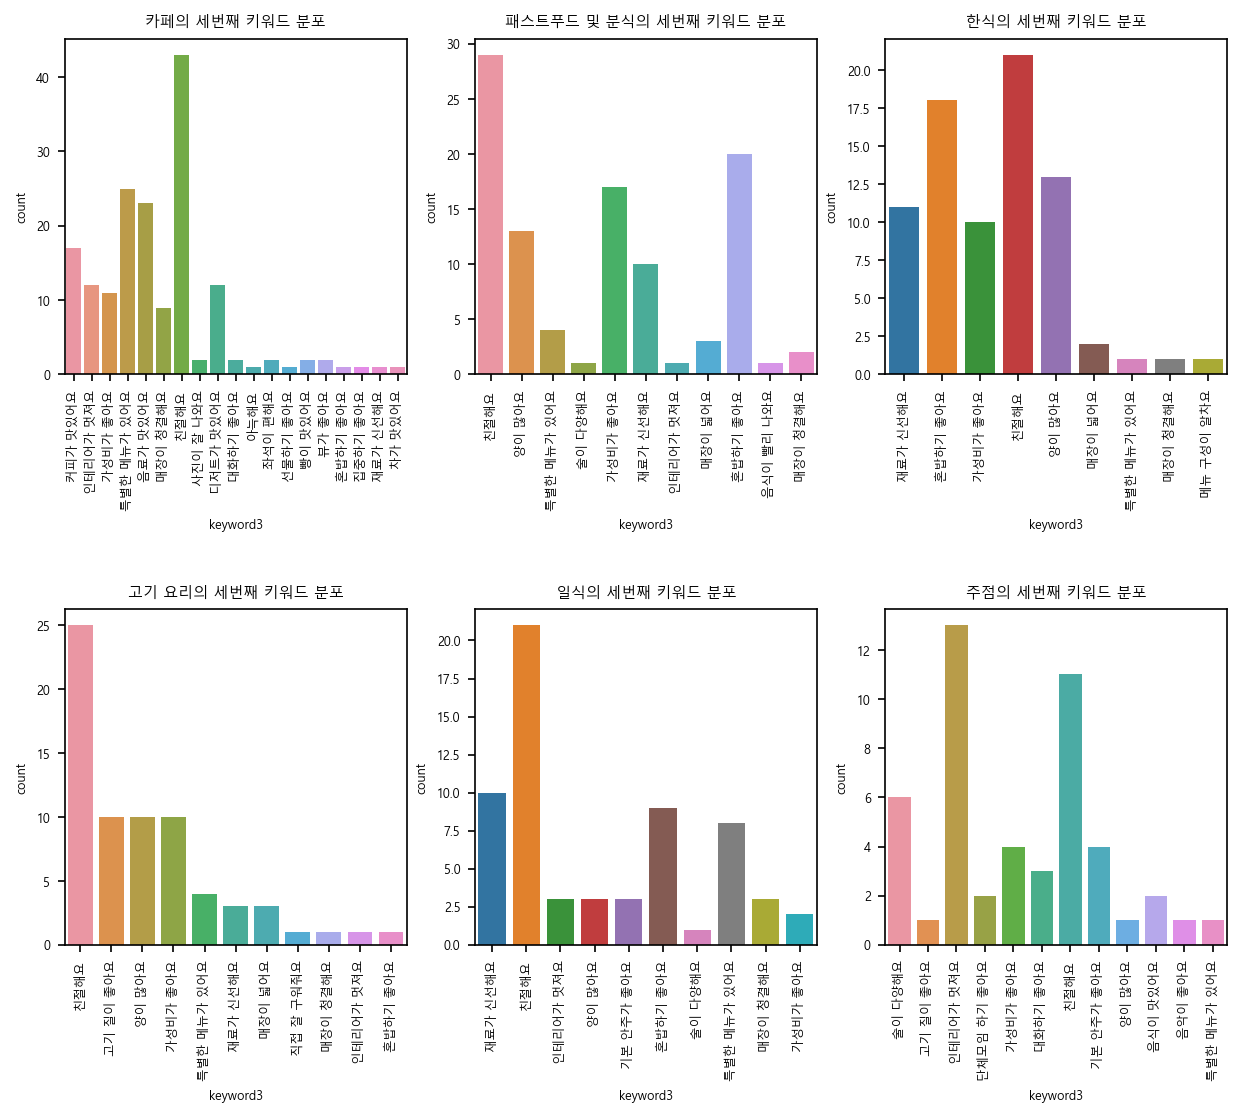

In [20]:
### keyword3
f, ax = plt.subplots(2,3,figsize=(10,8))

sns.countplot(x='keyword3', data=df[df['category']=='카페'], ax=ax[0,0])
ax[0,0].set_title('카페의 세번째 키워드 분포')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90)

sns.countplot(x='keyword3', data=df[df['category']=='패스트푸드및분식'], ax=ax[0,1])
ax[0,1].set_title('패스트푸드 및 분식의 세번째 키워드 분포')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90)

sns.countplot(x='keyword3', data=df[df['category']=='한식'], ax=ax[0,2])
ax[0,2].set_title('한식의 세번째 키워드 분포')
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=90)

sns.countplot(x='keyword3', data=df[df['category']=='고기요리'], ax=ax[1,0])
ax[1,0].set_title('고기 요리의 세번째 키워드 분포')
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

sns.countplot(x='keyword3', data=df[df['category']=='일식'], ax=ax[1,1])
ax[1,1].set_title('일식의 세번째 키워드 분포')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

sns.countplot(x='keyword3', data=df[df['category']=='주점'], ax=ax[1,2])
ax[1,2].set_title('주점의 세번째 키워드 분포')
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.2, hspace=0.7)
plt.show()

- 두번째, 세번째 키워드는 첫번째 키워드보다 다양하게 나타남

### 키워드별 리뷰의 워드클라우드

In [ ]:
!pip install wordcloud

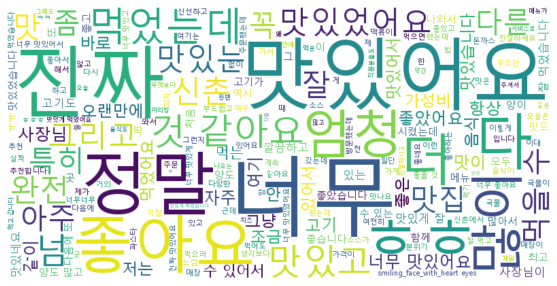

In [25]:
### keyword1 : '음식이 맛있어요'
from wordcloud import WordCloud

text = " ".join(review for review in df[df['keyword1']=='음식이 맛있어요']['reviews'])

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Windows/Fonts/malgun.ttf').generate(text)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

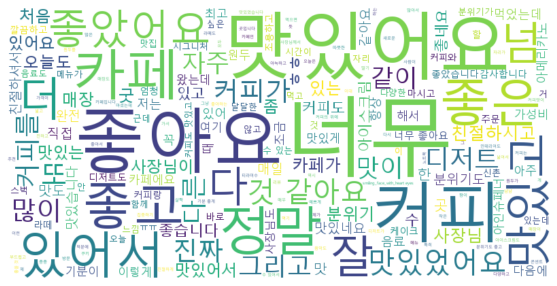

In [24]:
### keyword1 : '커피가 맛있어요'
from wordcloud import WordCloud

text = " ".join(review for review in df[df['keyword1']=='커피가 맛있어요']['reviews'])

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Windows/Fonts/malgun.ttf').generate(text)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

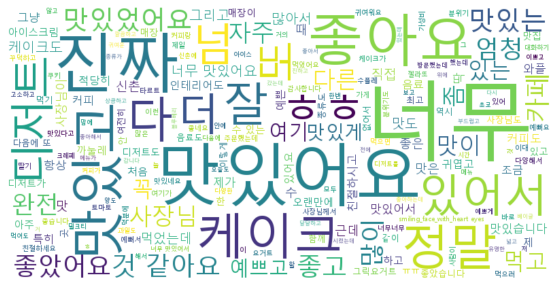

In [26]:
### keyword1 : '디저트가 맛있어요'
from wordcloud import WordCloud

text = " ".join(review for review in df[df['keyword1']=='디저트가 맛있어요']['reviews'])

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Windows/Fonts/malgun.ttf').generate(text)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

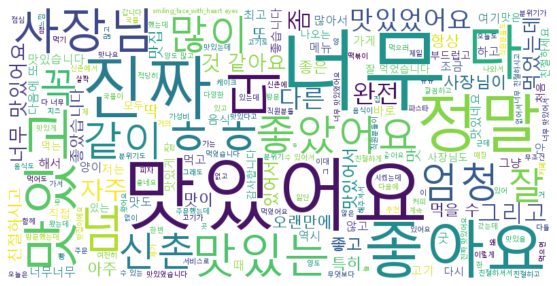

In [27]:
### keyword2 : '친절해요'
from wordcloud import WordCloud

text = " ".join(review for review in df[df['keyword2']=='친절해요']['reviews'])

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Windows/Fonts/malgun.ttf').generate(text)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

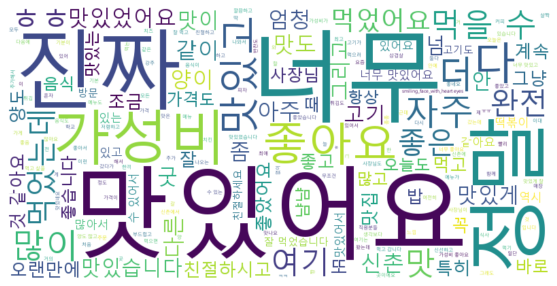

In [28]:
### keyword2 : '가성비가 좋아요'
from wordcloud import WordCloud

text = " ".join(review for review in df[df['keyword2']=='가성비가 좋아요']['reviews'])

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Windows/Fonts/malgun.ttf').generate(text)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

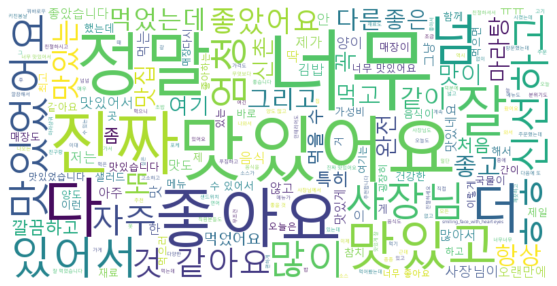

In [29]:
### keyword2 : '재료가 신선해요'
from wordcloud import WordCloud

text = " ".join(review for review in df[df['keyword2']=='재료가 신선해요']['reviews'])

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='C:/Windows/Fonts/malgun.ttf').generate(text)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 키워드별 매장 종류 시각화

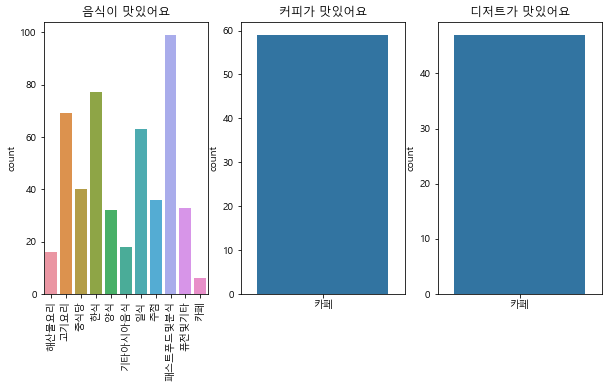

In [42]:
# keyword1
f, ax = plt.subplots(1,3,figsize=(10,5))
sns.countplot(x='category', data=df[df['keyword1']=='음식이 맛있어요'], ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_title('음식이 맛있어요')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(x='category', data=df[df['keyword1']=='커피가 맛있어요'], ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_title('커피가 맛있어요')

sns.countplot(x='category', data=df[df['keyword1']=='디저트가 맛있어요'], ax=ax[2])
ax[2].set_title('디저트가 맛있어요')
ax[2].set_xlabel('')

plt.subplots_adjust(wspace=0.2, hspace=0.7)
plt.show()

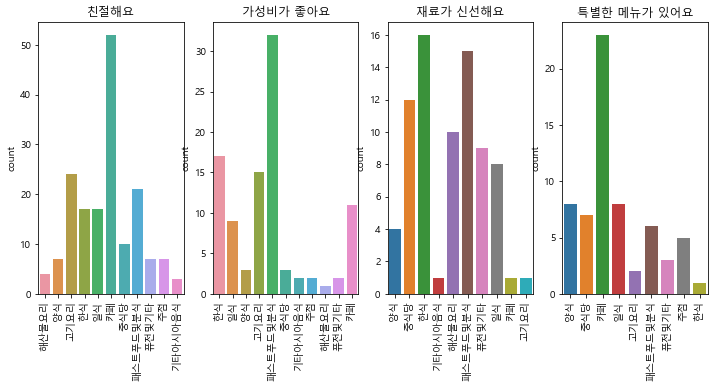

In [44]:
# keyword2
f, ax = plt.subplots(1,4,figsize=(12,5))
sns.countplot(x='category', data=df[df['keyword2']=='친절해요'], ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_title('친절해요')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(x='category', data=df[df['keyword2']=='가성비가 좋아요'], ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_title('가성비가 좋아요')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

sns.countplot(x='category', data=df[df['keyword2']=='재료가 신선해요'], ax=ax[2])
ax[2].set_xlabel('')
ax[2].set_title('재료가 신선해요')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)

sns.countplot(x='category', data=df[df['keyword2']=='특별한 메뉴가 있어요'], ax=ax[3])
ax[3].set_xlabel('')
ax[3].set_title('특별한 메뉴가 있어요')
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.2, hspace=0.7)
plt.show()